ANALISIS DE DATOS

Carga de librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

carga del fichero

In [3]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/annaalfaro/TFM/main/prediccionesSO.csv'
sales_order = pd.read_csv(url)

Distribución de la cantidad solicitada (SO_Quantity)

In [4]:
# Descripción estadística de la cantidad solicitada
quantity_stats = sales_order['Predicted_Quantity'].describe()
print(quantity_stats)

count    365.000000
mean     131.174262
std        1.449095
min      126.967437
25%      130.162995
50%      131.804025
75%      132.447311
max      132.757772
Name: Predicted_Quantity, dtype: float64


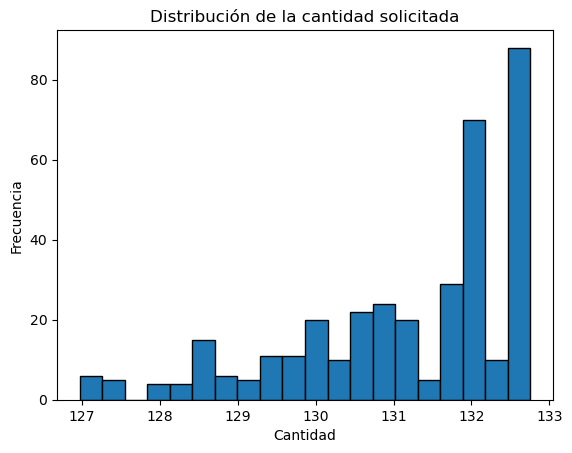

In [5]:
# Histograma de la cantidad solicitada
plt.hist(sales_order['Predicted_Quantity'], bins=20, edgecolor='black')
plt.title('Distribución de la cantidad solicitada')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

Frecuencia de órdenes por cliente (SO_Client)

Frecuencia de productos solicitados (SO_CustomerItemid)

In [6]:
# Conteo de productos solicitados
product_counts = sales_order['SO_CustomerItemid'].value_counts()
print(product_counts.head())


2    43
1    42
5    41
3    39
4    38
Name: SO_CustomerItemid, dtype: int64


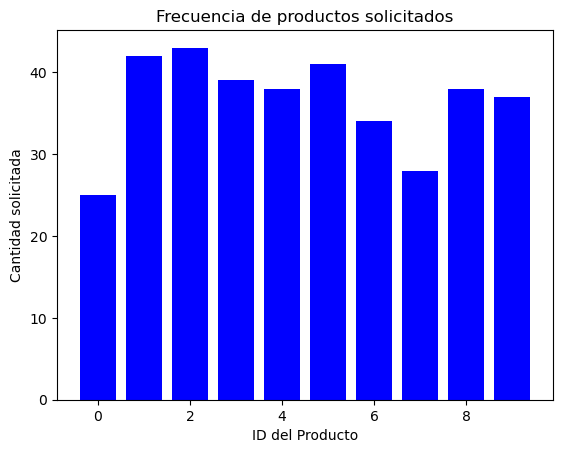

In [7]:
# Gráfico de barras de los productos más solicitados
plt.bar(product_counts.index, product_counts.values, color='blue')
plt.title('Frecuencia de productos solicitados')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad solicitada')
plt.xticks(rotation=0)
plt.show()

Relación entre cantidad solicitada y cliente/producto

In [8]:
# Promedio de cantidad solicitada por producto
avg_quantity_per_product = sales_order.groupby('SO_CustomerItemid')['Predicted_Quantity'].mean()
print(avg_quantity_per_product.head())


SO_CustomerItemid
0    129.308918
1    132.169440
2    131.794298
3    131.887326
4    131.883568
Name: Predicted_Quantity, dtype: float64


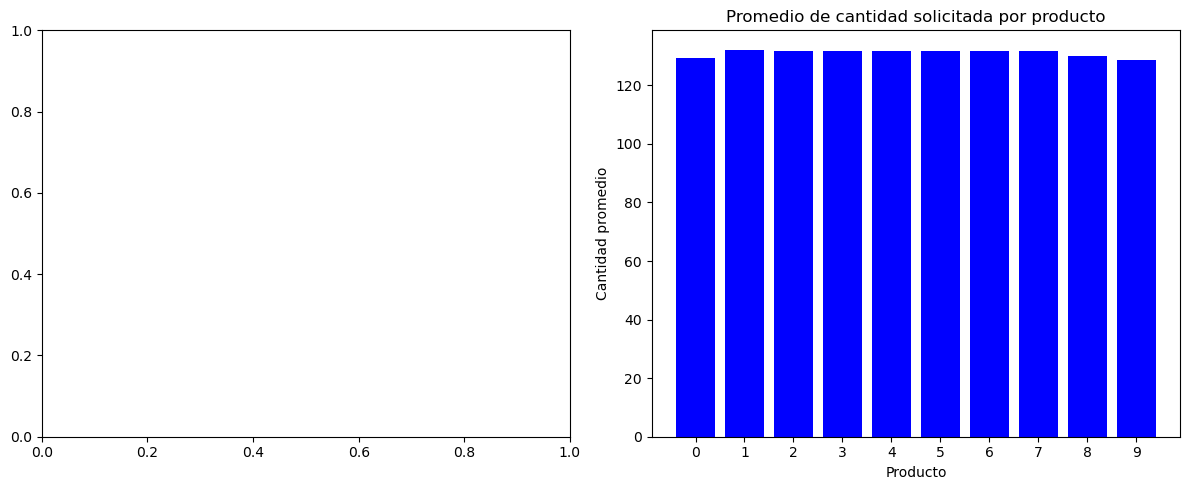

In [9]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para la cantidad solicitada por producto
ax2.bar(avg_quantity_per_product.index, avg_quantity_per_product.values, color='blue')
ax2.set_title('Promedio de cantidad solicitada por producto')
ax2.set_xlabel('Producto')
ax2.set_ylabel('Cantidad promedio')
ax2.set_xticks(range(len(avg_quantity_per_product.index)))
ax2.set_xticklabels(avg_quantity_per_product.index)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Meses con más demandas recibidas

In [10]:
# Asegurarse de que la columna SO_Date esté en formato datetime
sales_order['SO_Date'] = pd.to_datetime(sales_order['SO_Date'])  

# Extraer el mes de la columna SO_Date
sales_order['Order_Month'] = sales_order['SO_Date'].dt.month

# Contar el número de pedidos por mes
orders_per_month = sales_order['Order_Month'].value_counts().sort_index()

# Nombres de los meses en español
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Reemplazar los números de los meses por sus nombres en el valor numérico
orders_per_month.index = orders_per_month.index.map(lambda x: month_names[x-1])

# Mostrar los valores numéricos de pedidos por mes
print("Número de pedidos por mes:")
print(orders_per_month)

Número de pedidos por mes:
Enero         31
Febrero       28
Marzo         31
Abril         30
Mayo          31
Junio         30
Julio         31
Agosto        31
Septiembre    30
Octubre       31
Noviembre     30
Diciembre     31
Name: Order_Month, dtype: int64


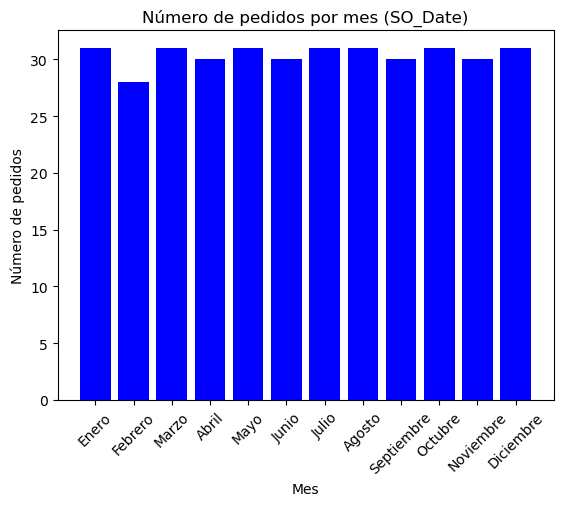

In [11]:
# Gráfico de barras del número de pedidos por mes
plt.bar(orders_per_month.index, orders_per_month.values, color='blue')
plt.title('Número de pedidos por mes (SO_Date)')
plt.xlabel('Mes')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.show()

Meses que se esperan más recepciones

In [12]:
# Asegurarse de que la columna SO_EstDate esté en formato datetime
sales_order['SO_EstDate'] = pd.to_datetime(sales_order['SO_EstDate'])

# Extraer el mes de la columna SO_EstDate
sales_order['Est_Month'] = sales_order['SO_EstDate'].dt.month

# Contar el número de recepciones esperadas por mes
receipts_per_month = sales_order['Est_Month'].value_counts().sort_index()

# Reemplazar los números de los meses por sus nombres en el valor numérico
receipts_per_month.index = receipts_per_month.index.map(lambda x: month_names[x-1])

# Mostrar los valores numéricos de recepciones esperadas por mes
print("\nNúmero de recepciones esperadas por mes:")
print(receipts_per_month)


Número de recepciones esperadas por mes:
Enero         26
Febrero       28
Marzo         33
Abril         29
Mayo          32
Junio         24
Julio         37
Agosto        28
Septiembre    35
Octubre       27
Noviembre     27
Diciembre     39
Name: Est_Month, dtype: int64


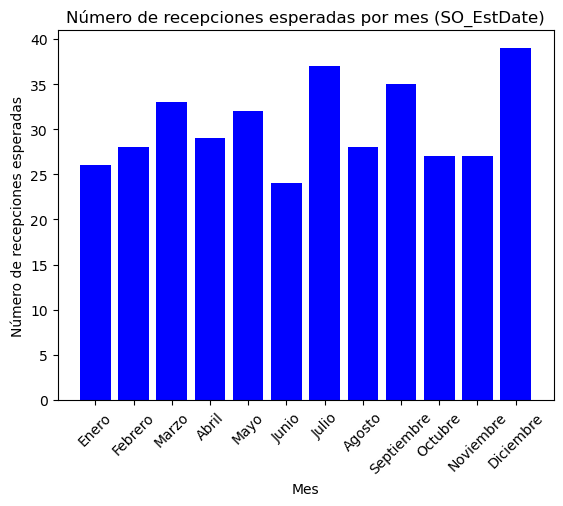

In [13]:
# Gráfico de barras del número de recepciones esperadas por mes
plt.bar(receipts_per_month.index, receipts_per_month.values, color='blue')
plt.title('Número de recepciones esperadas por mes (SO_EstDate)')
plt.xlabel('Mes')
plt.ylabel('Número de recepciones esperadas')
plt.xticks(rotation=45)
plt.show()